In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pmdarima as pm


In [77]:
# read the dataset
df = pd.read_csv('financial-data/energy_consumption.csv')

In [78]:
df

timeStamp  demand  precip   temp
0      2012-01-01 00:00:00  4937.5  0.0000  46.13
1      2012-01-01 01:00:00  4752.1  0.0000  45.89
2      2012-01-01 02:00:00  4542.6  0.0000  45.04
3      2012-01-01 03:00:00  4357.7  0.0000  45.03
4      2012-01-01 04:00:00  4275.5  0.0000  42.61
...                    ...     ...     ...    ...
49200  2017-08-12 02:00:00     NaN  0.0000  70.84
49201  2017-08-12 03:00:00     NaN  0.0000  70.57
49202  2017-08-12 04:00:00     NaN  0.0000  69.89
49203  2017-08-12 05:00:00     NaN  0.0000  68.59
49204  2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 4 columns]

In [79]:
# converting the timeStamp col to DateTime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

<AxesSubplot:>

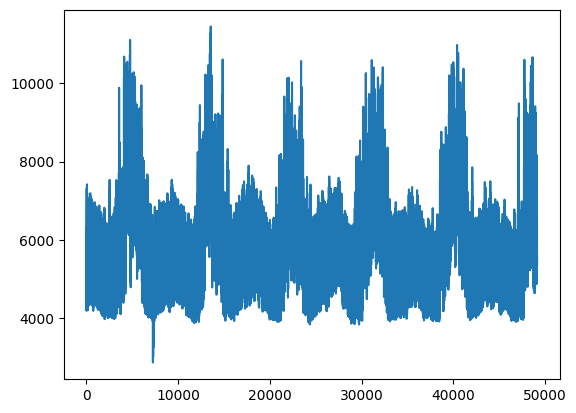

In [80]:
# plotting the demand col
df['demand'].plot()

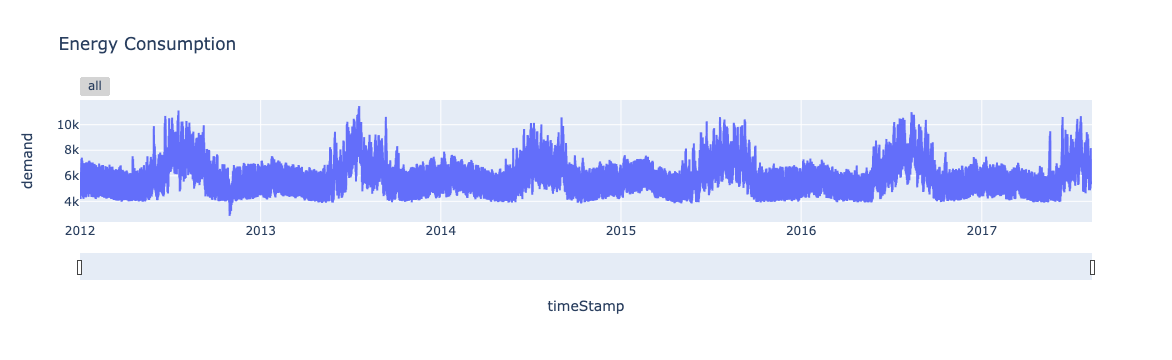

In [81]:
# dynamic plotting the demand col with plotly
fig = px.line(df, x='timeStamp', y='demand', title='Energy Consumption')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()


In [82]:
el_df = df.set_index('timeStamp')

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

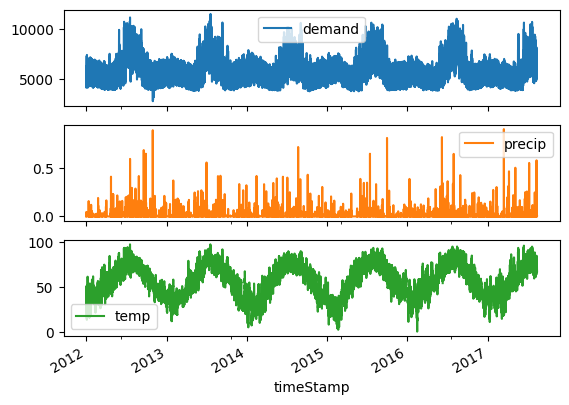

In [83]:
# plot for dependent and independents variables
el_df.plot(subplots=True)

In [84]:
# missing values
print(f"Missing values in the dataset: {el_df.isnull().sum()}")

Missing values in the dataset: demand     81
precip    230
temp      186
dtype: int64


In [85]:
# imputing missing values
el_df['demand'].fillna(el_df['demand'].fillna(method='ffill'), inplace=True)

In [86]:
el_df['temp'].fillna(el_df['temp'].fillna(method='ffill'), inplace=True)

In [87]:
el_df['precip'].fillna(el_df['precip'].fillna(method='ffill'), inplace=True)

In [88]:
print(f"Missing values in the dataset: {el_df.isnull().any()}")

Missing values in the dataset: demand    False
precip    False
temp      False
dtype: bool


In [89]:
# dataset resampling by month
el_df_resampled = el_df.resample('M').mean()

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

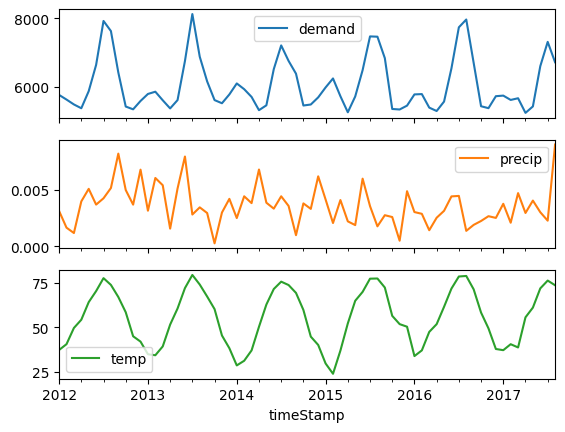

In [90]:
el_df_resampled.plot(subplots=True)

In [91]:
# initialize auto ARIMA model with PMDARIMA library and Augmented Dickey-Fuller test 
model = pm.auto_arima(el_df_resampled['demand'], m=12, seasonal=True, 
                      start_p=0, start_q=0, max_order=4, 
                      test='adf', error_action='ignore',  
                           suppress_warnings=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.330, Time=0.35 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1035.078, Time=0.40 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.17 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1017.902, Time=0.45 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.02 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : 

In [92]:
# splitting the dataset
# train, test = el_df_resampled.iloc[:len(el_df_resampled)-12], el_df_resampled.iloc[len(el_df_resampled)-12:]
train = el_df_resampled[(el_df_resampled.index.get_level_values(0) <= '2017-04-30')]

In [93]:
train

demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2016-12-31  5720.892685  0.002509  37.730417
2017-01-31  5737.960759  0.003749  37.063629
2017-02-28  5611.677426  0.002085  40.434955
2017-03-31  5660.977832  0.004687  38.599489
2017-04-30  5233.477382  0.002942  55.621764

[64 rows x 3 columns]

In [94]:
test = el_df_resampled[(el_df_resampled.index.get_level_values(0) > '2017-04-30')]

In [95]:
test

demand    precip       temp
timeStamp                                   
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002266  76.380363
2017-08-31  6711.707542  0.008961  73.730258

In [96]:
# train the model
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [97]:
# forecasting the test dataset
forecast = model.predict(n_periods=len(test), return_conf_int=True)

In [98]:
forecast

(2017-05-31    5320.832886
 2017-06-30    6194.150658
 2017-07-31    7184.108057
 2017-08-31    7297.999583
 Freq: M, dtype: float64,
 array([[4724.37026214, 5917.29551054],
        [5391.43562997, 6996.86568557],
        [6358.61983488, 8009.59627945],
        [6467.74927584, 8128.24988984]]))

In [99]:
forecast_df = pd.DataFrame(forecast[0], index = test.index, columns=['forecast'])

<AxesSubplot:xlabel='timeStamp'>

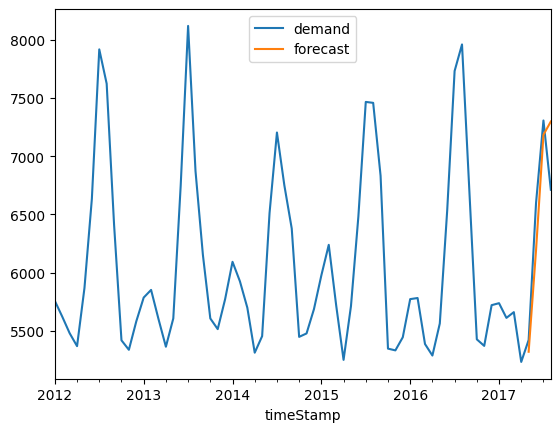

In [101]:
pd.concat([el_df_resampled['demand'], forecast_df], axis=1).plot()

In [102]:
forecast2 = model.predict(n_periods=4, return_conf_int=True)

In [103]:
forecast2

(2017-05-31    5320.832886
 2017-06-30    6194.150658
 2017-07-31    7184.108057
 2017-08-31    7297.999583
 Freq: M, dtype: float64,
 array([[4724.37026214, 5917.29551054],
        [5391.43562997, 6996.86568557],
        [6358.61983488, 8009.59627945],
        [6467.74927584, 8128.24988984]]))

In [104]:
forecast_df2 = pd.DataFrame(forecast2[0], index = test.index, columns=['Forecast'])

In [105]:
forecast_df2

Forecast
timeStamp              
2017-05-31  5320.832886
2017-06-30  6194.150658
2017-07-31  7184.108057
2017-08-31  7297.999583

<AxesSubplot:xlabel='timeStamp'>

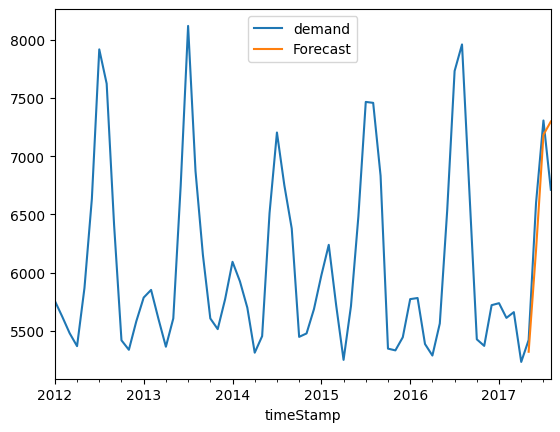

In [106]:
pd.concat([el_df_resampled['demand'], forecast_df2], axis=1).plot()

In [107]:
# predict the unseen future time series values
forecast_future = model.predict(n_periods=8, return_conf_int=True)
forecast_eight_month_range = pd.date_range(start='2017-05-31', periods=8, freq='M')

In [108]:
forecast_future_df = pd.DataFrame(forecast_future[0], index = forecast_eight_month_range, columns=['Forecast'])

<AxesSubplot:>

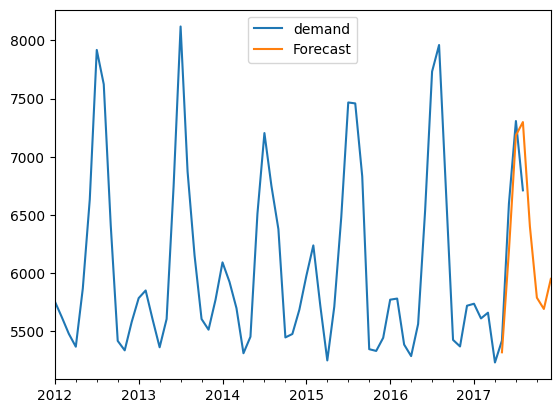

In [110]:
pd.concat([el_df_resampled['demand'], forecast_future_df], axis=1).plot()